# Importing Libraries and Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
anket_1 = pd.read_csv('Anket1_preprocessed.csv')
anket_2 = pd.read_csv('Anket2_preprocessed.csv')
anket_3 = pd.read_csv('Anket3_preprocessed.csv')
anket_4 = pd.read_csv('Anket4_preprocessed.csv')

## Data extracting function

In [ ]:
def extract_values(dataframe, condition):
    values_list = []
    for index, row in dataframe.iterrows():
        for col in dataframe.columns:
            if condition in col:
                if col.startswith(condition):
                    values_list.append(row[col])
    return values_list

# Fillers

## Grammatical Fillers (Score-based)

In [ ]:
anket1_ctgram_scores = extract_values(anket_1, "CTGRAM")
anket2_ctgram_scores = extract_values(anket_2, "CTGRAM")
anket3_ctgram_scores = extract_values(anket_3, "CTGRAM")
anket4_ctgram_scores = extract_values(anket_4, "CTGRAM")

In [ ]:
total_ctgram_scores = anket1_ctgram_scores + anket2_ctgram_scores + anket3_ctgram_scores + anket4_ctgram_scores
total_ctgram_scores = pd.Series(total_ctgram_scores)

In [ ]:
total_ctgram_scores.describe()

count    715.000000
mean       1.860140
std        1.826514
min       -3.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for Grammatical Filler Sentences')

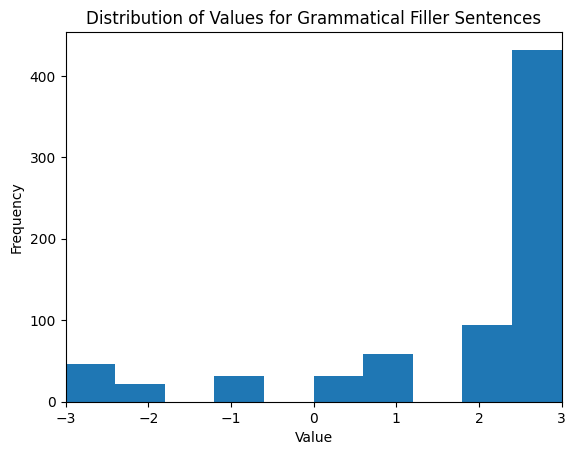

In [ ]:
plt.hist(total_ctgram_scores)

# add labels and title
plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for Grammatical Filler Sentences')

## Ungrammatical Fillers (Score-based)

In [ ]:
anket1_ctungram_scores = extract_values(anket_1, "CTUNGRAM")
anket2_ctungram_scores = extract_values(anket_2, "CTUNGRAM")
anket3_ctungram_scores = extract_values(anket_3, "CTUNGRAM")
anket4_ctungram_scores = extract_values(anket_4, "CTUNGRAM")

In [ ]:
total_ctungram_scores = anket1_ctungram_scores + anket2_ctungram_scores + anket3_ctungram_scores + anket4_ctungram_scores
total_ctungram_scores = pd.Series(total_ctungram_scores)

In [ ]:
total_ctungram_scores.describe()

count    715.000000
mean      -1.595804
std        1.710974
min       -3.000000
25%       -3.000000
50%       -2.000000
75%       -1.000000
max        3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Values for Ungrammatical Filler Sentences')

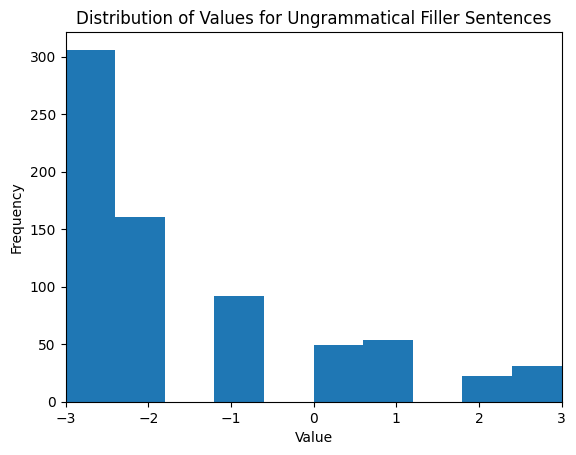

In [ ]:
plt.hist(total_ctungram_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values for Ungrammatical Filler Sentences')

## Grammatical Fillers (Informant-based)

In [ ]:
anket1_ctgram_p_scores = extract_values(anket_1, "ctgram_mean")
anket2_ctgram_p_scores = extract_values(anket_2, "ctgram_mean")
anket3_ctgram_p_scores = extract_values(anket_3, "ctgram_mean")
anket4_ctgram_p_scores = extract_values(anket_4, "ctgram_mean")

In [ ]:
total_ctgram_p_scores = anket1_ctgram_p_scores + anket2_ctgram_p_scores + anket3_ctgram_p_scores + anket4_ctgram_p_scores
total_ctgram_p_scores = pd.Series(total_ctgram_p_scores)

In [ ]:
total_ctgram_p_scores.describe()

count    65.000000
mean      1.860140
std       1.047685
min      -3.000000
25%       1.545455
50%       2.181818
75%       2.454545
max       3.000000
dtype: float64

Text(0.5, 1.0, 'Distribution of Average Values for Grammatical (Informant Based) Filler Sentences')

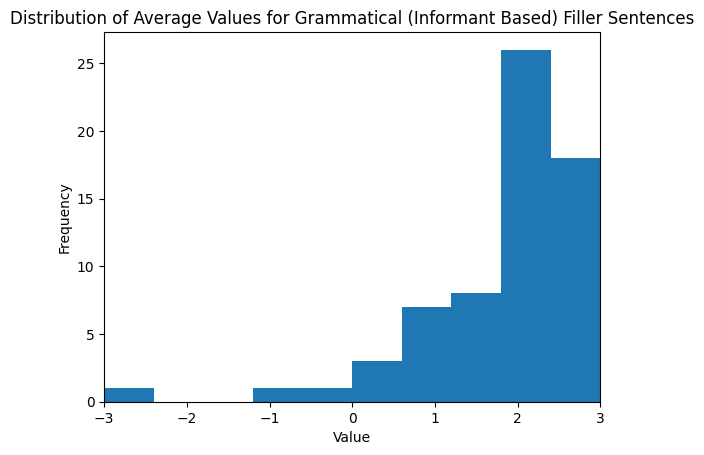

In [ ]:
plt.hist(total_ctgram_p_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Values for Grammatical (Informant Based) Filler Sentences')

## Ungrammatical Fillers (Informant-based)

In [ ]:
anket1_ctungram_p_scores = extract_values(anket_1, "ctungram_mean")
anket2_ctungram_p_scores = extract_values(anket_2, "ctungram_mean")
anket3_ctungram_p_scores = extract_values(anket_3, "ctungram_mean")
anket4_ctungram_p_scores = extract_values(anket_4, "ctungram_mean")

In [ ]:
total_ctungram_p_scores = anket1_ctungram_p_scores + anket2_ctungram_p_scores + anket3_ctungram_p_scores + anket4_ctungram_p_scores
total_ctungram_p_scores = pd.Series(total_ctungram_p_scores)

In [ ]:
total_ctungram_p_scores.describe()

count    65.000000
mean     -1.595804
std       1.164097
min      -3.000000
25%      -2.454545
50%      -1.909091
75%      -1.090909
max       1.454545
dtype: float64

Text(0.5, 1.0, 'Distribution of Average Values for Ungrammatical (Informant Based) Filler Sentences')

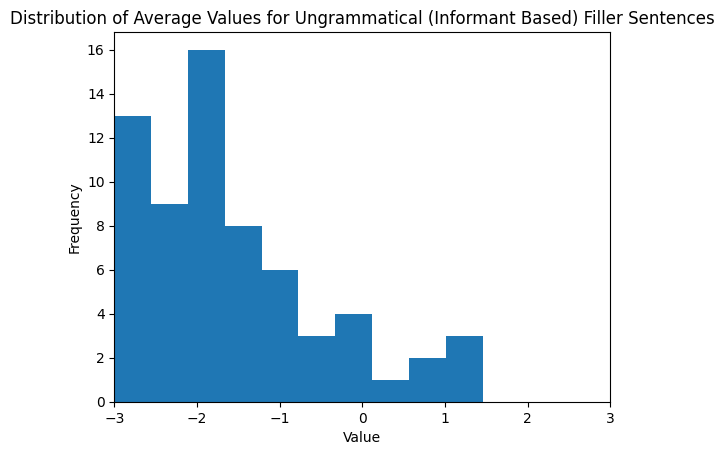

In [ ]:
plt.hist(total_ctungram_p_scores)

plt.xlim(-3, 3)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Values for Ungrammatical (Informant Based) Filler Sentences')

# Eliminating Outliers/Non-compliant Participants

In [ ]:
iqr_multiplier = 1.6

# Calculate IQR for each dataset using Q3 and Q1
iqr_ctungram = total_ctungram_p_scores.quantile(0.75) - total_ctungram_p_scores.quantile(0.25)
iqr_ctgram = total_ctgram_p_scores.quantile(0.75) - total_ctgram_p_scores.quantile(0.25)

# Calculate thresholds using IQR multiplier and Q3/Q1
UT_ung = total_ctungram_p_scores.quantile(0.25) + (iqr_multiplier * iqr_ctungram)
LT_ung = total_ctungram_p_scores.quantile(0.75) - (iqr_multiplier * iqr_ctungram)

UT_g = total_ctgram_p_scores.quantile(0.25) + (iqr_multiplier * iqr_ctgram)
LT_g = total_ctgram_p_scores.quantile(0.75) - (iqr_multiplier * iqr_ctgram)

In [ ]:
print("UT_ung:", UT_ung)
print("LT_ung:", LT_ung)

print("UT_g:", UT_g)
print("LT_g:", LT_g)

ctgram_threshold = LT_g
ctungram_threshold = UT_ung

UT_ung: -0.2727272727272725
LT_ung: -3.272727272727273
UT_g: 3.0
LT_g: 0.9999999999999998


In [ ]:
def eliminate_outliers(df, ctgram_threshold, ctungram_threshold):
    """
    Removes rows from the dataframe that have ctgram_mean lower than ctgram_threshold
    or ctungram_mean higher than ctungram_threshold.

    """
    cleaned_df = df.copy()

    removed_rows = 0

    for i, row in cleaned_df.iterrows():
        if row['ctgram_mean'] < ctgram_threshold:
            print(f"Removed participant's ID:  {row['id']}")
            print(f"Removal reason: ctgram_mean below threshold.")
            print("*************************************************")

            cleaned_df.drop(i, inplace=True)
            removed_rows += 1

        elif row['ctungram_mean'] > ctungram_threshold:
            print(f"Removed participant's ID:  {row['id']}")
            print(f"Removal reason: ctungram_mean above threshold.")
            print("*************************************************")

            cleaned_df.drop(i, inplace=True)

            removed_rows += 1

    print(f"The number of participants eliminated:  {removed_rows}")
    return cleaned_df

In [ ]:
cleaned_anket1 = eliminate_outliers(anket_1,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  5
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  7
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  13
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  15
Removal reason: ctgram_mean below threshold.
*************************************************
The number of participants eliminated:  4


In [ ]:
cleaned_anket2 = eliminate_outliers(anket_2,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  1
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  3
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  9
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  23
Removal reason: ctgram_mean below threshold.
*************************************************
The number of participants eliminated:  4


In [ ]:
cleaned_anket3 = eliminate_outliers(anket_3,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  6
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  8
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  10
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  12
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  15
Removal reason: ctungram_mean above threshold.
*************************************************
The number of participants eliminated:  5


In [ ]:
cleaned_anket4 = eliminate_outliers(anket_4,
                                    ctgram_threshold = ctgram_threshold,
                                    ctungram_threshold = ctungram_threshold)

Removed participant's ID:  5
Removal reason: ctungram_mean above threshold.
*************************************************
Removed participant's ID:  12
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  17
Removal reason: ctgram_mean below threshold.
*************************************************
Removed participant's ID:  18
Removal reason: ctungram_mean above threshold.
*************************************************
The number of participants eliminated:  4
